# Linear Regression


### Linear Regression Notation

**Single feature:**

$\hat{y} = f(x) = w_0 + w_1 x$

**Multiple features:**

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$

**Matrix form:**

$\hat{y} = X W$

where  

$X = 
\begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1n} \\
1 & x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix} \in \mathbb{R}^{m \times (n+1)}$

- The first column of 1's accounts for the bias term $w_0$.  
- $W = 
\begin{bmatrix} 
w_0 \\ w_1 \\ \vdots \\ w_n 
\end{bmatrix} \in \mathbb{R}^{(n+1) \times 1}$  

$\hat{y} \in \mathbb{R}^{m \times 1}$

---

### Mean Squared Error (MSE)

The error function measures the distance between predicted and actual values:

$E(X) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2$

- Squaring ensures negative differences do not cancel positive ones.  
- Some literature uses absolute value instead of squaring.  
- The scaling factor $1/n$ is optional for optimization purposes.

**Cost function:**

$J(W) = (\hat{y} - y)^2$

---

### Vectorized form

For any vector $v$:  

$v^2 = v^\top v$

Example:  

$v = 
\begin{bmatrix} v_0 \\ v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}, 
\quad
v^\top = 
\begin{bmatrix} v_0 & v_1 & v_2 & \dots & v_n \end{bmatrix}, 
\quad
v^\top v = v_0^2 + v_1^2 + \dots + v_n^2
$

So for the prediction error:  

$(\hat{y} - y)^2 = (\hat{y} - y)^\top (\hat{y} - y) = (X W - y)^\top (X W - y)$


## Derivative of the Linear Regression Cost Function

We want to minimize the cost function:

$$
J(W) = (XW - Y)^\top (XW - Y)
$$

---

### Step 1: First term: $W^\top X^\top X W$

Let 

$$
A = X^\top X
$$

so the first term is 

$$
W^\top A W
$$

Differential:

$$
d(W^\top A W) = dW^\top A W + W^\top A dW
$$

- $W$ is $n \times 1$, $dW$ is $n \times 1$, $dW^\top$ is $1 \times n$, $AW$ is $n \times 1$  
- $dW^\top A W$ is a scalar, and scalars equal their transpose:

$$
dW^\top A W = (dW^\top A W)^\top = (AW)^\top dW
$$

Similarly:

$$
W^\top A dW = (A^\top W)^\top dW
$$

Combine:

$$
d(W^\top A W) = (AW + A^\top W)^\top dW
$$

Since $A = X^\top X$ is symmetric:

$$
d(W^\top A W) = 2 (X^\top X W)^\top dW
$$

Gradient:

$$
\nabla_W (W^\top X^\top X W) = 2 X^\top X W
$$

---

### Step 2: Second term: $-2 Y^\top X W$

Differential:

$$
d(-2 Y^\top X W) = -2 d(Y^\top X W) = -2 (X^\top Y)^\top dW
$$

Gradient:

$$
\nabla_W (-2 Y^\top X W) = -2 X^\top Y
$$

---

### Step 3: Third term: $Y^\top Y$

- Constant with respect to $W$, derivative = 0

---

### Step 4: Combine all gradients

$$
\nabla_W J(W) = 2 X^\top X W - 2 X^\top Y
$$

Set gradient to zero:

$$
2 X^\top X W - 2 X^\top Y = 0
\quad \implies \quad
X^\top X W = X^\top Y
$$

---

### Step 5: Closed-form solution

$$
\boxed{W = (X^\top X)^{-1} X^\top Y}
$$

## Minimizing the Linear Regression Cost Function

Our goal is to **minimize**:

$\operatorname*{argmin}_W \; (XW - y)^\top (XW - y)$

---

### Step 1: First derivative

- To minimize, we first compute the **gradient** (first derivative).  
- Setting the gradient to zero gives the **critical points**, which are candidates for the minimum.

---

## Step 2: CLOSED FORM SOLUTION
The cost function:

$J(W) = (XW - y)^\top (XW - y)$

---

### Step 3: Expand using transpose properties

- $(A - B)^\top = A^\top - B^\top$

Example:

$A = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}, \quad
B = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$

Then:

$(A - B)^\top = A^\top - B^\top = \begin{bmatrix} a_1 - b_1 & a_2 - b_2 \end{bmatrix}$

---

### Step 4: Apply to $J(W)$

$J(W) = ((XW)^\top - y^\top)(XW - y)$

Expanding:

$J(W) = (XW)^\top XW - (XW)^\top y - y^\top XW + y^\top y$

- Scalars satisfy $(XW)^\top y = y^\top XW$, so we can simplify:

$J(W) = (XW)^\top XW - 2 (XW)^\top y + y^\top y$

---

### Step 5: Transpose property for matrix products

- For matrices $A$ and $B$:

$(AB)^\top = B^\top A^\top$

- Example:
Let

$$
A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}, 
\quad
B = \begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{bmatrix}
$$

**Multiply**

$$
AB = 
\begin{bmatrix} 
a_{11} & a_{12} \\ 
a_{21} & a_{22} 
\end{bmatrix} 
\begin{bmatrix} 
b_{11} & b_{12} \\ 
b_{21} & b_{22} 
\end{bmatrix} 
=
\begin{bmatrix} 
a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\ 
a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22} 
\end{bmatrix}
$$

**Transpose**

$$(AB)^\top = 
\begin{bmatrix} 
a_{11}b_{11} + a_{12}b_{21} & a_{21}b_{11} + a_{22}b_{21} \\ 
a_{11}b_{12} + a_{12}b_{22} & a_{21}b_{12} + a_{22}b_{22} 
\end{bmatrix}$$

**Compare** 

$$
B^\top = \begin{bmatrix} b_{11} & b_{21} \\ b_{12} & b_{22} \end{bmatrix}, 
\quad
A^\top = \begin{bmatrix} a_{11} & a_{21} \\ a_{12} & a_{22} \end{bmatrix}
$$

$$
B^\top A^\top = 
\begin{bmatrix} b_{11} & b_{21} \\ b_{12} & b_{22} \end{bmatrix} 
\begin{bmatrix} a_{11} & a_{21} \\ a_{12} & a_{22} \end{bmatrix} 
=
\begin{bmatrix} 
b_{11}a_{11} + b_{21}a_{12} & b_{11}a_{21} + b_{21}a_{22} \\ 
b_{12}a_{11} + b_{22}a_{12} & b_{12}a_{21} + b_{22}a_{22} 
\end{bmatrix}
= (AB)^\top
$$


### Closed-form solution on Housing Data

In [1]:
import pandas as pd

housing = pd.read_csv("HousingData.csv")

housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
housing.isna().value_counts()

CRIM   ZN     INDUS  CHAS   NOX    RM     AGE    DIS    RAD    TAX    PTRATIO  B      LSTAT  MEDV 
False  False  False  False  False  False  False  False  False  False  False    False  False  False    394
True   False  False  False  False  False  False  False  False  False  False    False  False  False     19
False  False  False  False  False  False  False  False  False  False  False    False  True   False     18
                                          True   False  False  False  False    False  False  False     18
                     True   False  False  False  False  False  False  False    False  False  False     17
              True   False  False  False  False  False  False  False  False    False  False  False     16
       True   False  False  False  False  False  False  False  False  False    False  False  False     16
              True   False  False  False  False  False  False  False  False    False  False  False      2
       False  False  True   False  False  False  Fals

In [4]:
# Fill missing values with the mean
housing.fillna(inplace=True, value=housing.mean())

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

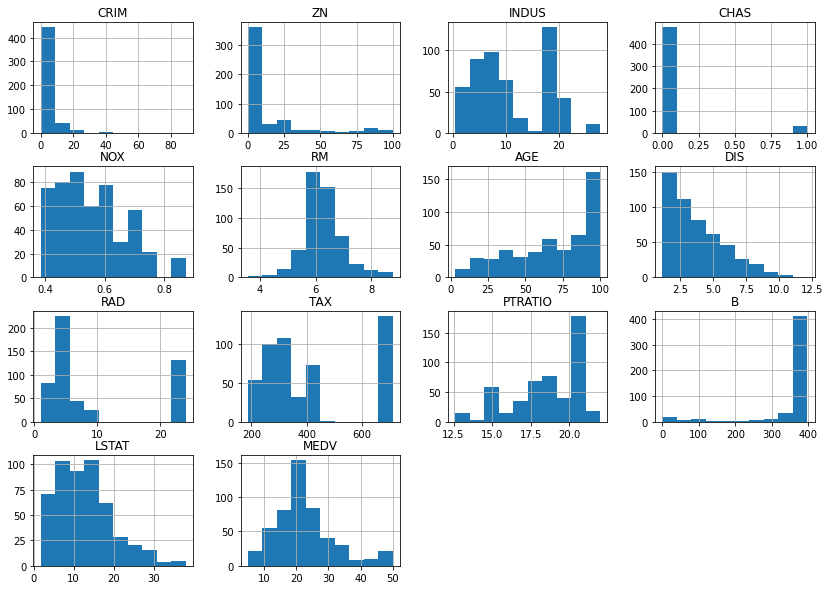

In [5]:
import matplotlib.pyplot as plt
housing.hist(figsize=(14, 10))

In [6]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

- **CRIM** — per capita crime rate by town  
- **ZN** — proportion of residential land zoned for lots over 25,000 sq.ft.  
- **INDUS** — proportion of non-retail business acres per town  
- **CHAS** — Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- **NOX** — nitric oxides concentration (parts per 10 million)  
- **RM** — average number of rooms per dwelling  
- **AGE** — proportion of owner-occupied units built prior to 1940  
- **DIS** — weighted distances to five Boston employment centres  
- **RAD** — index of accessibility to radial highways  
- **TAX** — full-value property-tax rate per 10,000 USD  
- **PTRATIO** — pupil-teacher ratio by town  
- **B** — $1000(B_k - 0.63)^2$, where $B_k$ is the proportion of blacks by town  
- **LSTAT** — % lower status of the population  
- **MEDV** — median value of owner-occupied homes in $1000's$


In [28]:
X_housing = housing[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

y_housing = housing[["MEDV"]]

In [29]:
# Split the dataset: training vs test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_housing,  y_housing, test_size=0.2, random_state=42)

In [30]:
# Apply the the closed form equation 
import numpy as np
from numpy import linalg as LA

W = np.linalg.inv(X_train.values.T @ X_train.values) @ (X_train.values.T @ y_train.values)

In [31]:
y_pred = X_test @ W

In [32]:
def get_mse(y_true: "NDArray[np.float64]", y_predicted: "NDArray[np.float64]") -> float:
    return np.mean((y_true - y_pred) ** 2)

mean_squared_error = get_mse(y_test.values, y_pred)
mean_squared_error

0    29.29686
dtype: float64

We get a fairly small mse, because the closed-form solution gives the best possible fit.
It guarantees the smallest possible MSE, but not necessarily zero.

## Gradient Descent

### Gradient Descent

Gradient descent is an optimization algorithm that can optimize linear regression and other machine learning algorithms such as logistic regression, t-SNE, etc.

---

### Gradient Descent Intuition

$$
y = wx + b
$$

- Pick a random value for the intercept \( b \), e.g. 0.  
- Estimate how good this intercept fits the line using the **sum of squared residuals**.  
- Plot the sum of squared residuals.

For increasing values of the intercept, we keep getting different points.  
We can plot them.  
The lowest point on the graph — the **global minimum** — is what we want.  
That’s what it means to **minimize the cost function**.

Gradient Descent picks a few points and increases the number of calculations as we get closer to the global minimum.  
It takes **big steps** when we’re far away and **small steps** when we’re close.

We can plug in any value of the intercept and get the sum of residuals.  
Now we have an equation for the curve (of the sum of residuals).  
We can find the **slope of the line** by calculating the **derivative of the curve**.

Least Squares simply finds where the derivative is equal to zero.  
But this is not always possible — for example, some matrices are not invertible.

Gradient Descent, on the other hand, keeps adjusting.  
The closer we get to the optimal value of the intercept, the closer the graph gets to zero.  
When the slope is close to zero, take small steps.

---

### Step Update Rule

The **step size** is directly proportional to the slope:

$$
\text{Step size} = \text{slope} \times \text{learning rate}
$$

The **learning rate** is usually a small number so that we don’t take a really big step.

$$
b_{\text{new}} = b_{\text{old}} - \text{step size}
$$

---

### Stopping Criteria

- Stop whenever the step size is close to 0 (e.g. 0.001).  
- Or include a maximum number of steps to take before giving up (e.g. 1000).  

Some functions might not be good convex functions — sometimes it might jump across, etc.  
Fortunately, the **MSE cost for Linear Regression** is a convex function, meaning there is **one global minimum**, so it’s guaranteed to converge.

# Partial Derivatives for Each Parameter

# Linear Regression Cost Function

The mean squared error (MSE) cost function for a line \(y = wx + b\) is:

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} \big( y_i - (w x_i + b) \big)^2
$$

- Here, \(w\) is the slope and \(b\) is the intercept.  
- \(n\) is the number of data points.  
- \(J(w, b)\) measures how far off the predicted values \((w x_i + b)\) are from the actual values \(y_i\).  


**Derivative w.r.t. slope \(w\):**

$$
\frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i \big(y_i - (w x_i + b)\big)
$$

The gradient for \(w\) is proportional to how much \(x_i\) is "off" from the predicted line.

---

**Derivative w.r.t. intercept \(b\):**

$$
\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \big(y_i - (w x_i + b)\big)
$$

This measures how much the prediction is off regardless of \(x_i\).

---

# Gradient Descent Updates

$$
w_{\text{new}} = w_{\text{old}} - \alpha \frac{\partial J}{\partial w}
$$

$$
b_{\text{new}} = b_{\text{old}} - \alpha \frac{\partial J}{\partial b}
$$

\(\alpha\) is the learning rate controlling the step size.


In [15]:
def train(X, y, w, b, n_iterations, learning_rate):
    slopes, losses = [], []
    n = len(X)
    
    for _ in range(n_iterations):
        y_pred = X @ w + b
        error = y_pred - y
        
        # Gradients
        dw = (2/n) * X.T @ error
        db = (2/n) * np.sum(error)
        
        # Update weights
        w -= learning_rate * dw
        b -= learning_rate * db
        
        squared_error = np.mean(error ** 2)
        losses.append(squared_error)
        slopes.append(np.linalg.norm(w))
        
    return w, b, losses, slopes

In [57]:
w = np.zeros((13, 1))
b = 0.0
n_iterations = 5000
learning_rate = 0.000001

# Train
w_final, b_final, losses, slopes = train(X_train.values, y_train.values, w, b, n_iterations, learning_rate)

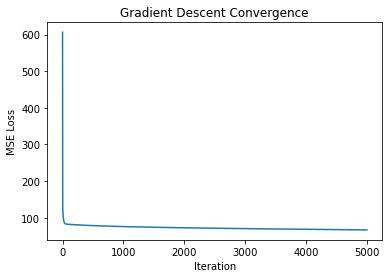

In [58]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.show()

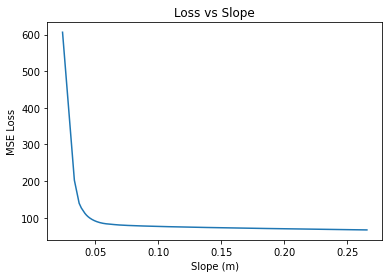

In [59]:
plt.plot(slopes, losses)
plt.xlabel("Slope (m)")
plt.ylabel("MSE Loss")
plt.title("Loss vs Slope")
plt.show()

In [60]:
# Predictions on test set
y_pred = X_test @ w_final

# MSE
mse = get_mse(y_test.values, y_pred)
print("MSE:", mse)

MSE: 0    53.150064
dtype: float64


Our MSE 53.15 vs 29.3 (closed-form) could be improved by scaling our data and using state-of-the art Linear R.

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

Coefficient: [[-1.00420142  0.66411045 -0.18169767  0.82178765 -1.88300173  3.36742995
  -0.53169579 -3.23884258  1.91161353 -1.51870251 -1.97228447  1.1214543
  -3.04990363]]
Intercept: [22.79653465]
MSE: 25.01767202384286
